In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

### Descripción del Dataset de Diabetes

## X
- age age in years
- sex
- bmi body mass index (**vamos a utilizar solamente esta variable**)
- bp average blood pressure
- s1 tc, T-Cells (a type of white blood cells)
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, thyroid stimulating hormone
- s5 ltg, lamotrigine
- s6 glu, blood sugar level

## y
- es la progresion de la enfermedad a una año después de la medición.

In [3]:
# Cargar el dataset
X, y = datasets.load_diabetes(return_X_y=True)

In [4]:
# X tiene 10 variables (columnas / features y 442 ejemplos)
X.shape

(442, 10)

In [5]:
# vamos a seleccionar un solo feature (una sola variable)
# esta variable es Bmi (Body Mass Index)
bmi = X[:, np.newaxis, 2]

In [6]:
# vamos a renombrar y, para que represente el nivel de progreso de la enfermedad
progreso = y

### Desplegar **Todos** los datos con Matplotlib

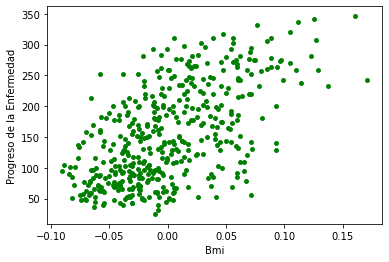

In [7]:
plt.scatter(bmi,progreso, marker = ".", s = 60, c = "green")
plt.xlabel("Bmi")
plt.ylabel("Progreso de la Enfermedad")
plt.show()

### Selección de Set de Entrenamiento (70%) y Pruebas (30%)

In [8]:
# aqui utilizamos la funcion train_test_split de sklearn para seleccionar los sets.
from sklearn.model_selection import train_test_split

bmi_train, bmi_test, progreso_train, progreso_test = train_test_split(bmi, progreso, test_size=0.30, random_state=42)

### Desplegar set de entrenamiento y set de pruebas

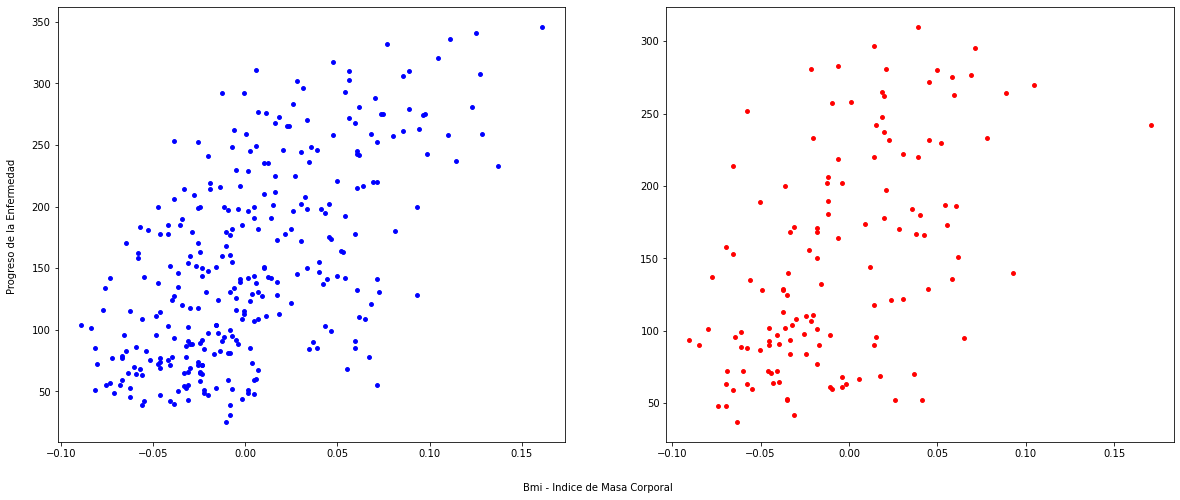

In [9]:
# vamos a crear una figura con 2 slots con matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# ax1 es el primer grafico del set de entrenamiento (Azul)
ax1.scatter(bmi_train,progreso_train, marker = ".", s = 60, c = "blue")

# ax2 es el segundo grafico del set de pruebas (Rojo)
ax2.scatter(bmi_test,progreso_test, marker = ".", s = 60, c = "red")

fig.text(0.5, 0.04, 'Bmi - Indice de Masa Corporal', ha='center')
fig.text(0.09, 0.5, 'Progreso de la Enfermedad', va='center', rotation='vertical')

plt.show()

### Regresion Lineal

Para iniciar con regresión lineal, debemos tener una función de predicción:

- $y=\beta_0 +\beta_1 x$

Donde:

* $\beta_0$ es la intersección con el eje Y
* $\beta_1$ es la pendiente

Cual es el objetivo de Regresión Lineal:

* encontrar los coeficientes $\beta_0$ y $\beta_1$ que minimicen el error. En otras palabras, encontrar los coeficientes beta tales que cuando el modelo se dibuje (la línea de predicción), ésta pase lo más cerca de todos los puntos.


In [10]:
# funciones de regresion lineal:
def regresion_lineal(X, b0, b1):
    return b0 + b1 * X

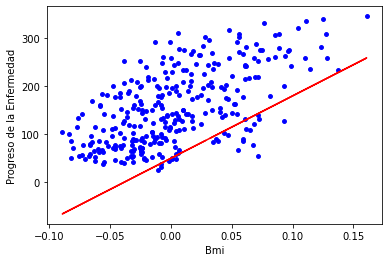

In [11]:
# vamos a definir unos parametros beta cualquiera para probar el ajuste.
# todo el estudio de ajuste y estimacion de parametros se hace sobre el set de entrenamiento

b_0i = 50
b_1i = 1300

plt.scatter(bmi_train,progreso_train, marker = ".", s = 60, c = "blue")
plt.xlabel("Bmi")
plt.ylabel("Progreso de la Enfermedad")

# aqui estimamos la linea de regresion con unos parametros beta inventados.
y_prima = regresion_lineal(bmi_train, b_0i, b_1i)

# desplegamos el modelo
plt.plot(bmi_train, y_prima, c = "red")

plt.show()

### Como encontrar $\beta_0$ y $\beta_1$

$
{\displaystyle {\text{Encuentre }}\min _{\beta_0 ,\,\beta_1 }Q(\beta_0 ,\beta_1 ),\quad {\text{for }}Q(\beta_0 ,\beta_1 )=\sum _{i=1}^{n}{\widehat {\varepsilon }}_{i}^{\,2}=\sum _{i=1}^{n}(y_{i}-\beta_0 -\beta_1 x_{i})^{2}\ .}
$

Donde:

* La suma de residuales (RSS) = ${\varepsilon_1}^{2}+{\varepsilon_2}^{2}+, ..., +{\varepsilon_n}^{2}$
* ${\varepsilon_i}^{2} = (y_{i}-\beta_0 -\beta_1 x_{i})^{2}$
* Las variables $\beta_0$ and $\beta_1$ van a minimizar RSS. 

La pendiente $\beta_1$ se calcula:

* $\beta_1 = \frac{\sum{(x_i - \bar x)(y_i - \bar y)}}{\sum{(x_i - \bar x)}^{2}}$

$\beta_0$ se calcula como:

* $\beta_0 = \bar y - \beta_1\bar x$


In [12]:
# calculamos la pendiente

x = bmi_train
x_mean = np.mean(x)

y = progreso_train.reshape(-1,1)
y_mean = np.mean(y)

# b1
b_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)

# b0
b_0 = y_mean - b_1 * x_mean

# suma de residuales
rss = np.sum((y - b_0 - b_1 * x)**2)

print("b0:",b_0, "b1:", b_1, "rss:", rss)

b0: 151.0420244931607 b1: 988.4193124892661 rss: 1204931.5308257272


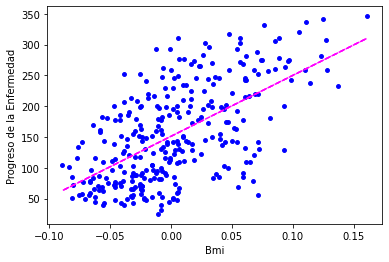

In [13]:
plt.scatter(bmi_train,progreso_train, marker = ".", s = 60, c = "blue")
plt.xlabel("Bmi")
plt.ylabel("Progreso de la Enfermedad")

# aqui estimamos la linea de regresion con unos parametros beta inventados.
y_prima = regresion_lineal(bmi_train, b_0, b_1)

# desplegamos el modelo que minimiza RSS
plt.plot(bmi_train, y_prima, 'r--', c = "magenta")

# coeficientes falsos del principio
# y_prima_falsa = regresion_lineal(bmi_train, b_0i, b_1i)
# nuestro modelo inicial
# plt.plot(bmi_train, y_prima_falsa, '-', c = "red")

plt.show()

In [14]:
rss_inicial = np.sum((y - b_0i - b_0i * x)**2)

print("RSS optimo:", rss)
print("RSS inicial:", rss_inicial)

RSS optimo: 1204931.5308257272
RSS inicial: 5157914.940897321


El RSS de 1,204,931 minimiza la función de regresión lineal bajo los coeficientes beta encontrados.

### MSE

* $MSE = \frac{1}{N}RSS$

MSE:
- <font color=red>Definición 1.13</font> *MSE* o Error Medio al Cuadrado, se usa para referirse a la estimación imparcial de la varianza del error: la suma residual de cuadrados dividida por el número de grados de libertad.
- <font color=red>Definición 1.14</font> *Función de Pérdida (Loss Function)* Es aquella que nos permite estimar la diferencia entre la predicción y el valor verdadero. Si la pérdida es igual a cero, entonces la predicción es perfecta. 

MSE es comúnmente utilizada como una función de pérdida para modelos de aprendizaje automático.


In [15]:
N = len(x)
mse =  (1/N) * rss
print("MSE:",mse)

MSE: 3899.4547923162695


## Que tan bueno es nuestro modelo, para predecir valores distintos al set de entrenamiento?

Para esto fue que sacamos un 30% de los datos en el test set, donde de verdad vamos validar nuestro modelo de regresión lineal.
El MSE 3899.4547 nos indica el ajuste para el set de entrenamiento. Ahora vamos a usar el modelo ya entrenado (algoritmo, y coeficientes beta) para predecir sobre el set de pruebas.

In [16]:
# realizamos la prediccion sobre el set de prueba con los coeficientes del set de entrenamiento
y_prima_test = regresion_lineal(bmi_test, b_0, b_1)

# calculamos RSS
x = bmi_test
y = progreso_test.reshape(-1,1)
rss_test = np.sum((y - b_0 - b_0 * x)**2)

# Calculamos  MSE
N = len(x)
mse_test =  (1/N) * rss_test

print("MSE Test:",mse_test)

MSE Test: 4902.655072995193


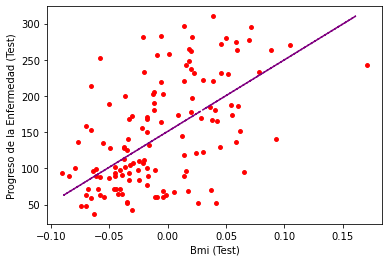

In [17]:
plt.scatter(bmi_test,progreso_test, marker = ".", s = 60, c = "red")
plt.xlabel("Bmi (Test)")
plt.ylabel("Progreso de la Enfermedad (Test)")

# desplegamos el modelo calculado
plt.plot(bmi_train, y_prima, 'r--', c = "purple")

plt.show()

In [18]:
print("Diferencia de la pérdida entre el Training y Test set:", mse_test - mse)

Diferencia de la pérdida entre el Training y Test set: 1003.2002806789237
